# Basic PCA for Visualizing Breas Cancer Data

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
bc = load_breast_cancer()
for key in bc:
    print key

target_names
data
target
DESCR
feature_names


In [4]:
X = pd.DataFrame(bc['data'], columns=bc['feature_names'])
Y = bc['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
R = np.transpose(np.asmatrix(X)) * np.asmatrix(X)
val, vec = np.linalg.eigh(R)
best_vectors = [np.squeeze(np.asarray(vec[-i])) for i in [1, 2, 3]]

Now we need to find projections of the original data into the space of eigenvalues we are investigating. I.E. we seek the matix $\mathbf{P}$ where the ith colum is given as

$\mathbf{P}_i = \mathbf{x}_i \cdot \mathbf{v}_i$

the inner product of the ith data entry with the ith eigenvector. We'll only invesitate three eigenvectors, as the purpose of the document is visualization in PCA, and other techniques are better suited to higher-dimensional visualization.

In [6]:
projections = np.empty([len(X), 3])
for i in range(len(X)):
    x = np.squeeze(np.asarray(X.loc[[i]]))
    projections[i][0] = np.dot(x, best_vectors[0])
    projections[i][1] = np.dot(x, best_vectors[1])
    projections[i][2] = np.dot(x, best_vectors[2])

proj_df = pd.DataFrame(projections, columns=['V1', 'V2', 'V3'])

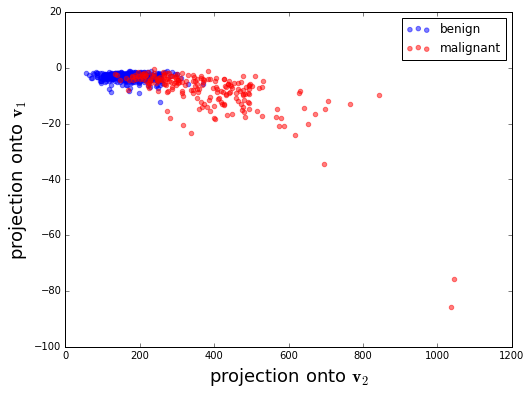

In [8]:
malignant = proj_df[Y == 0]
benign = proj_df[Y == 1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(benign['V1'], benign['V2'], label='benign', color='blue', alpha=0.5)
ax.scatter(malignant['V1'], malignant['V2'], label='malignant', color='red', alpha=0.5)
plt.xlabel(r'projection onto $\mathbf{v}_2$', fontsize=18)
plt.ylabel(r'projection onto $\mathbf{v}_1$', fontsize=18)
ax.legend(loc='best')
plt.show()

We can see some trends - maligant tumors have much more of the second eigenvector than non-malignant tumors. However, there is substantial overlap. We cannot use PCA to seperate the two classes using only the first two vectors. Lets take a look at the 3D picture.

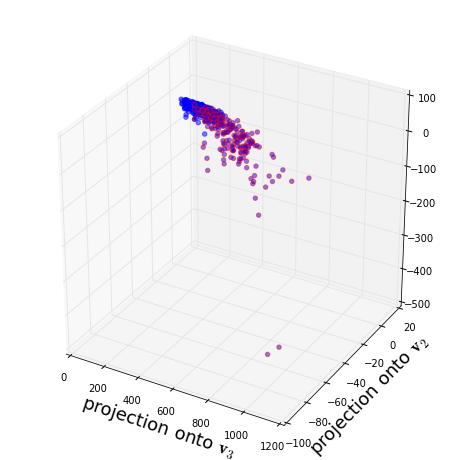

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(benign['V1'], benign['V2'], benign['V3'], label='benign', color='blue', alpha=0.5)
ax.scatter(malignant['V1'], malignant['V2'], malignant['V3'], label='malignant', color='red', alpha=0.5)

ax.set_xlabel(r'projection onto $\mathbf{v}_1$', fontsize=18)
ax.set_ylabel(r'projection onto $\mathbf{v}_2$', fontsize=18)
ax.set_xlabel(r'projection onto $\mathbf{v}_3$', fontsize=18)
plt.show()

It doesn't look like the third component is helping much, but it's difficult to tell from this angle - let's take a look at each of the three plotted against eachother.

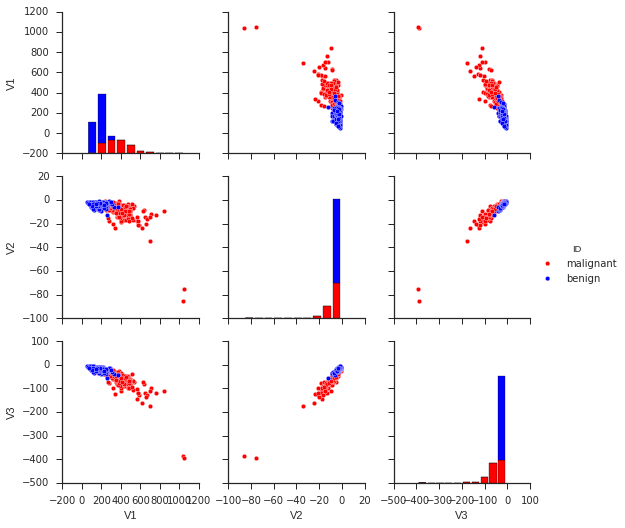

In [10]:
import seaborn as sns
sns.set(style="ticks")

proj_df['ID'] = np.asarray(['malignant' if i==0 else 'benign' for i in Y])
sns.pairplot(proj_df, vars=['V1', 'V2', 'V3'], hue="ID", palette=['red', 'blue'])
plt.show()